[(204, 1188, 590, 803)]
parametry częsci twarzy
left eye [(65, 119), (84, 104), (107, 99), (131, 110), (110, 117), (87, 120)]
right eye [(232, 98), (252, 81), (276, 80), (296, 90), (278, 97), (255, 99)]
nose tip [(149, 216), (171, 219), (193, 221), (215, 211), (236, 204)]
nose bridge [(176, 87), (178, 118), (180, 148), (183, 180)]
top lip [(124, 295), (151, 281), (177, 269), (197, 270), (220, 262), (251, 266), (284, 276), (274, 276), (223, 278), (200, 283), (180, 285), (134, 294)]
bottom lip [(284, 276), (257, 285), (230, 290), (207, 295), (186, 297), (157, 300), (124, 295), (134, 294), (183, 281), (202, 279), (225, 275), (274, 276)]
lewe oko zdj


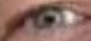

prawe oko zdj


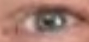

nos zdj


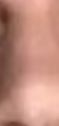

usta


In [21]:
import dlib
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
import os

cwd = os.getcwd()
inputDir = cwd + "/inputs"

image = face_recognition.load_image_file(inputDir + "/john_cenax.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
# display(pil_face_image)
# print(face_locations)
face_landmarks_list = face_recognition.face_landmarks(face_image, model='large')

for face_landmarks in face_landmarks_list:
    print("parametry częsci twarzy")
    print('left eye', face_landmarks['left_eye']) #6
    print('right eye', face_landmarks['right_eye']) #6
    print('nose tip', face_landmarks['nose_tip']) #5
    print('nose bridge', face_landmarks['nose_bridge']) #4
    print('top lip', face_landmarks['top_lip']) #12
    print('bottom lip', face_landmarks['bottom_lip']) #12
    


# lewe oko
print("lewe oko zdj")
# area = (43, 63, 113, 114) # 1: 58, 93 | 4: 103, 94 => 1: -15, -30 | 4: +10, +20
area = (face_landmarks['left_eye'][0][0]-15, face_landmarks['left_eye'][0][1]-30, face_landmarks['left_eye'][3][0]+10,face_landmarks['left_eye'][3][1]+20)
crop_img = pil_face_image.crop(area)
display(crop_img)

# prawe oko
print("prawe oko zdj")
# area = (153, 60, 223, 105) # 1: 168, 90 | 4: 213, 85
area = (face_landmarks['right_eye'][0][0]-15, face_landmarks['right_eye'][0][1]-30, face_landmarks['right_eye'][3][0]+10,face_landmarks['right_eye'][3][1]+20)
crop_img = pil_face_image.crop(area)
display(crop_img)

# nos
print("nos zdj")
# area = (153, 60, 223, 105) # 1: 168, 90 | 4: 213, 85
area = (face_landmarks['nose_bridge'][0][0]-25, face_landmarks['nose_bridge'][0][1]-10, face_landmarks['nose_bridge'][3][0]+27,face_landmarks['nose_bridge'][3][1]+23)
crop_img = pil_face_image.crop(area)
display(crop_img)

# usta
print("usta")
# area = (153, 60, 223, 105) # 1: 168, 90 | 4: 213, 85
area = (face_landmarks['top_lip'][0][0]-10, face_landmarks['top_lip'][0][1]-25, face_landmarks['top_lip'][6][0]+8,face_landmarks['top_lip'][6][1]+25)
crop_img = pil_face_image.crop(area)
display(crop_img)

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(804, 369), (812, 418), (824, 465), (835, 513), (851, 558), (879, 594), (920, 619), (966, 635), (1020, 634), (1074, 622), (1121, 600), (1161, 569), (1188, 528), (1201, 480), (1203, 425), (1201, 370), (1196, 315)]
The left_eyebrow in this face has the following points: [(822, 307), (832, 270), (864, 248), (901, 244), (936, 253)]
The right_eyebrow in this face has the following points: [(1011, 244), (1044, 225), (1082, 217), (1120, 227), (1144, 260)]
The nose_bridge in this face has the following points: [(977, 291), (979, 322), (980, 352), (982, 385)]
The nose_tip in this face has the following points: [(951, 423), (972, 424), (993, 426), (1015, 417), (1036, 409)]
The left_eye in this face has the following points: [(869, 328), (886, 309), (909, 304), (935, 315), (912, 321), (889, 326)]
The right_eye in this face has the following points: [(1035, 301), (1056, 284), (1079, 282), (1099, 294), (1081, 300

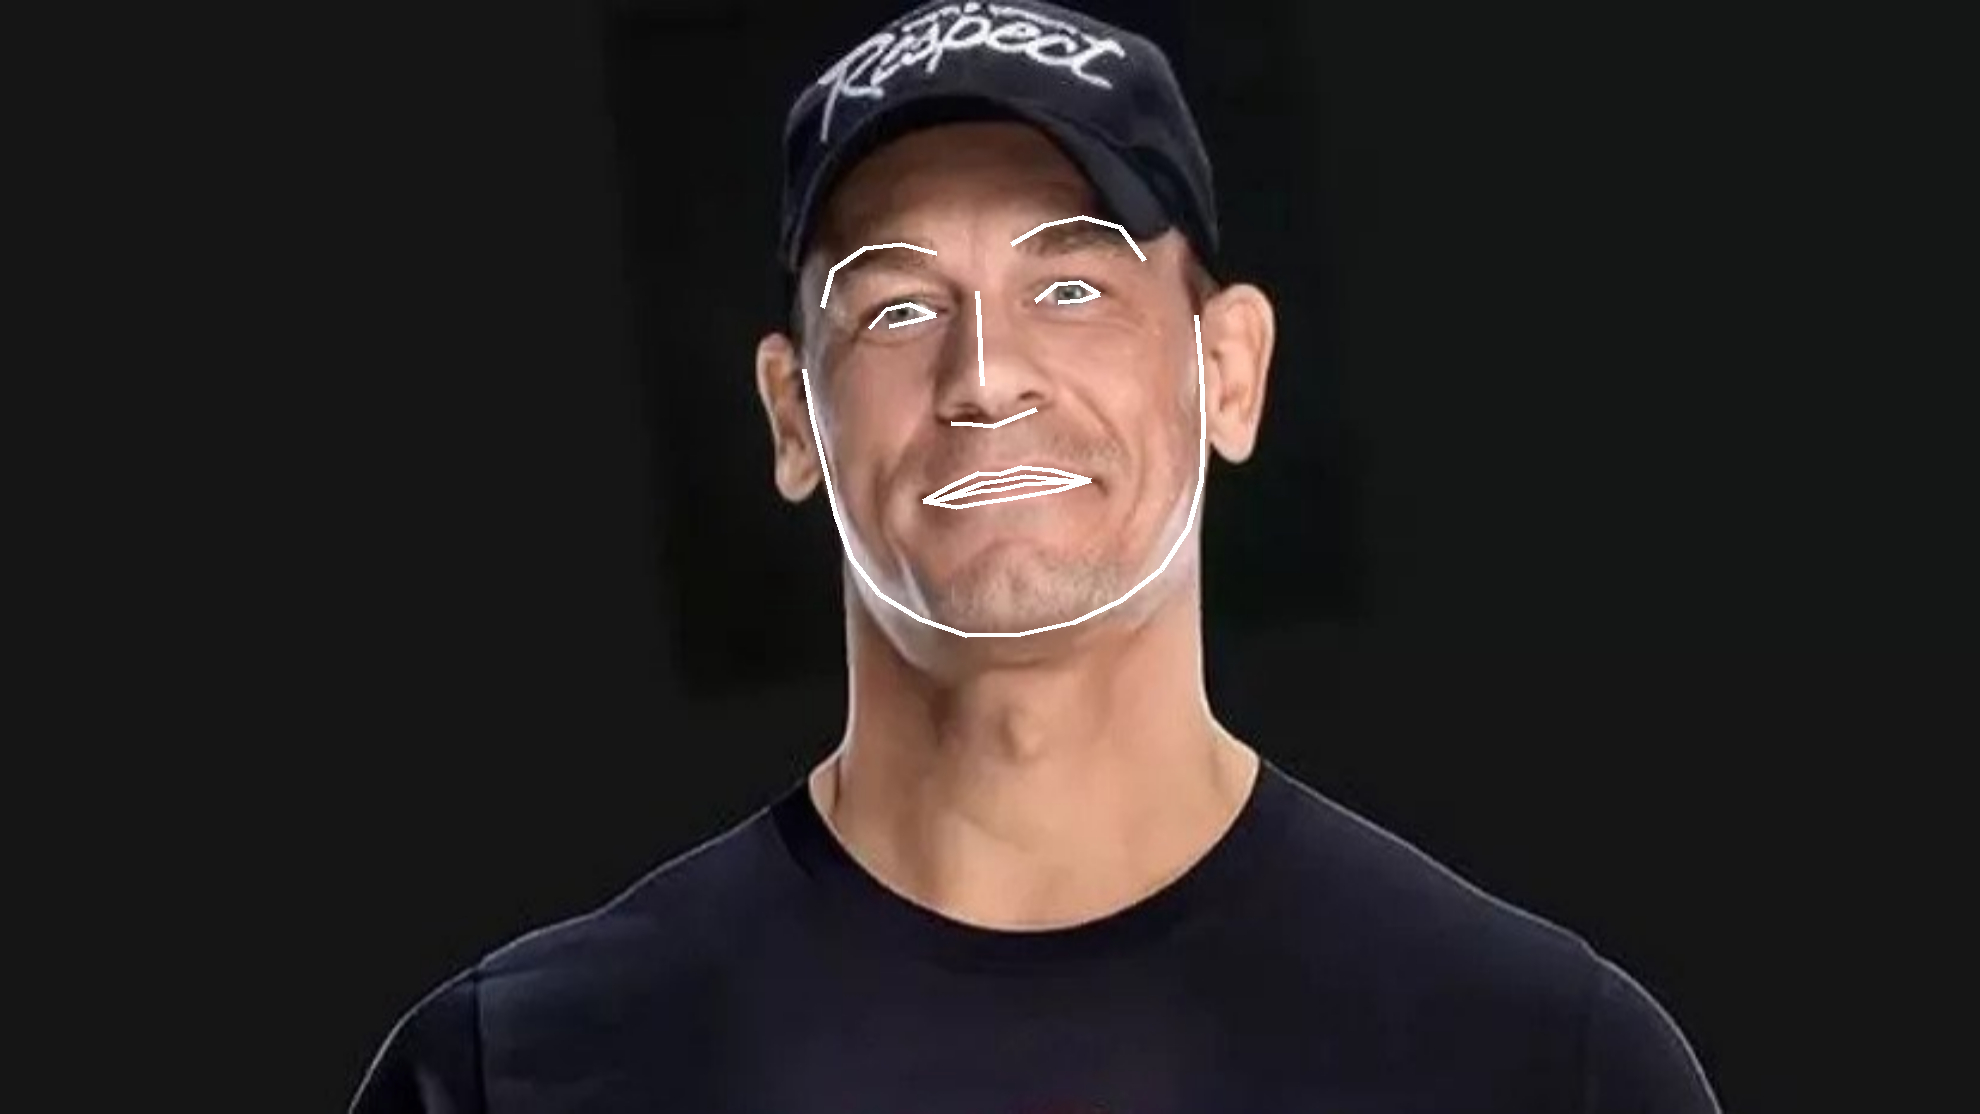

In [19]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file(inputDir + "/john_cenax.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
display(pil_image)

# for face_landmarks in face_landmarks_list:
#     d = ImageDraw.Draw(pil_image, 'RGBA')

#     # Make the eyebrows into a nightmare
#     d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
#     d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
#     d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
#     d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

#     # Gloss the lips
#     d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
#     d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
#     d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
#     d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

#     # Sparkle the eyes
#     d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
#     d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

#     # Apply some eyeliner
#     d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
#     d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

#     display(pil_image)

# for face_location in face_locations:
#     top, right, bottom, left = face_location
    
#     face_image = image[top:bottom, left:right]
#     pil_image = Image.fromarray(face_image)
#     display(pil_image) 
#